In [32]:
import scipy.io
import scipy
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

In [40]:
from comsolml import read_data
from comsolml.filter import butter_lowpass_filter
from comsolml.custom_fk import tx_fk_plot, make_fk
from comsolml.vel_estim import FK_thickness_estimation, make_lamb_curves

In [2]:
dt = 1e-6
numsensors = 8
circ = 3455*0.2e-3

In [3]:
def make_dx(decim):
    dx = circ/numsensors*decim
    return dx

def make_dtheta(decim):
    dtheta = 2*np.pi/numsensors*decim
    return dtheta

def conv_m_to_rad(meters, circumference):
    theta = 2*np.pi*meters/circumference
    return theta

In [4]:
steel = make_lamb_curves()


Calculating symmetric modes..

0/100 - 0.0 kHz × mm
1/100 - 101.0 kHz × mm
2/100 - 202.0 kHz × mm
3/100 - 303.0 kHz × mm
4/100 - 404.0 kHz × mm
5/100 - 505.1 kHz × mm
6/100 - 606.1 kHz × mm
7/100 - 707.1 kHz × mm
8/100 - 808.1 kHz × mm
9/100 - 909.1 kHz × mm
10/100 - 1010.1 kHz × mm
11/100 - 1111.1 kHz × mm
12/100 - 1212.1 kHz × mm
13/100 - 1313.1 kHz × mm
14/100 - 1414.1 kHz × mm
15/100 - 1515.2 kHz × mm
16/100 - 1616.2 kHz × mm
17/100 - 1717.2 kHz × mm
18/100 - 1818.2 kHz × mm
19/100 - 1919.2 kHz × mm
20/100 - 2020.2 kHz × mm
21/100 - 2121.2 kHz × mm
22/100 - 2222.2 kHz × mm
23/100 - 2323.2 kHz × mm
24/100 - 2424.2 kHz × mm
25/100 - 2525.3 kHz × mm


c:\Users\Magnus\PycharmProjects\PhD\Comsol_ML\notebooks\comsolml\lamb\lamb.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = omega/vp
c:\Users\Magnus\PycharmProjects\PhD\Comsol_ML\notebooks\comsolml\lamb\lamb.py:229: RuntimeWarning: invalid value encountered in sqrt
  p = np.sqrt((omega/self.c_L)**2 - k**2, dtype=np.complex128)
c:\Users\Magnus\PycharmProjects\PhD\Comsol_ML\notebooks\comsolml\lamb\lamb.py:230: RuntimeWarning: invalid value encountered in sqrt
  q = np.sqrt((omega/self.c_S)**2 - k**2, dtype=np.complex128)
c:\Users\Magnus\PycharmProjects\PhD\Comsol_ML\notebooks\comsolml\lamb\lamb.py:256: RuntimeWarning: invalid value encountered in cdouble_scalars
  symmetric = (np.tan(q*self.h)/q
c:\Users\Magnus\PycharmProjects\PhD\Comsol_ML\notebooks\comsolml\lamb\lamb.py:257: RuntimeWarning: invalid value encountered in cdouble_scalars
  + (4*(k**2)*p*np.tan(p*self.h))/(q**2 - k**2)**2)
c:\Users\Magnus\PycharmProjects\PhD\Comsol_ML\notebooks\comsolml\lamb\lamb.p

26/100 - 2626.3 kHz × mm
27/100 - 2727.3 kHz × mm
28/100 - 2828.3 kHz × mm
29/100 - 2929.3 kHz × mm
30/100 - 3030.3 kHz × mm
31/100 - 3131.3 kHz × mm
32/100 - 3232.3 kHz × mm
33/100 - 3333.3 kHz × mm
34/100 - 3434.3 kHz × mm
35/100 - 3535.4 kHz × mm
36/100 - 3636.4 kHz × mm
37/100 - 3737.4 kHz × mm
38/100 - 3838.4 kHz × mm
39/100 - 3939.4 kHz × mm
40/100 - 4040.4 kHz × mm
41/100 - 4141.4 kHz × mm
42/100 - 4242.4 kHz × mm
43/100 - 4343.4 kHz × mm
44/100 - 4444.4 kHz × mm
45/100 - 4545.5 kHz × mm
46/100 - 4646.5 kHz × mm
47/100 - 4747.5 kHz × mm
48/100 - 4848.5 kHz × mm
49/100 - 4949.5 kHz × mm
50/100 - 5050.5 kHz × mm
51/100 - 5151.5 kHz × mm
52/100 - 5252.5 kHz × mm
53/100 - 5353.5 kHz × mm
54/100 - 5454.5 kHz × mm
55/100 - 5555.6 kHz × mm
56/100 - 5656.6 kHz × mm
57/100 - 5757.6 kHz × mm
58/100 - 5858.6 kHz × mm
59/100 - 5959.6 kHz × mm
60/100 - 6060.6 kHz × mm
61/100 - 6161.6 kHz × mm
62/100 - 6262.6 kHz × mm
63/100 - 6363.6 kHz × mm
64/100 - 6464.6 kHz × mm
65/100 - 6565.7 kHz × mm


c:\Users\Magnus\PycharmProjects\PhD\Comsol_ML\notebooks\comsolml\lamb\lamb.py:284: RuntimeWarning: invalid value encountered in cdouble_scalars
  + (((q**2 - k**2)**2)*np.tan(p*self.h))/(4*(k**2)*p))
c:\Users\Magnus\PycharmProjects\PhD\Comsol_ML\notebooks\comsolml\lamb\lamb.py:283: RuntimeWarning: invalid value encountered in cdouble_scalars
  antisymmetric = (q * np.tan(q*self.h)
c:\Users\Magnus\PycharmProjects\PhD\Comsol_ML\notebooks\comsolml\lamb\lamb.py:284: RuntimeWarning: invalid value encountered in multiply
  + (((q**2 - k**2)**2)*np.tan(p*self.h))/(4*(k**2)*p))


35/100 - 3535.4 kHz × mm
36/100 - 3636.4 kHz × mm
37/100 - 3737.4 kHz × mm
38/100 - 3838.4 kHz × mm
39/100 - 3939.4 kHz × mm
40/100 - 4040.4 kHz × mm
41/100 - 4141.4 kHz × mm
42/100 - 4242.4 kHz × mm
43/100 - 4343.4 kHz × mm
44/100 - 4444.4 kHz × mm
45/100 - 4545.5 kHz × mm
46/100 - 4646.5 kHz × mm
47/100 - 4747.5 kHz × mm
48/100 - 4848.5 kHz × mm
49/100 - 4949.5 kHz × mm
50/100 - 5050.5 kHz × mm
51/100 - 5151.5 kHz × mm
52/100 - 5252.5 kHz × mm
53/100 - 5353.5 kHz × mm
54/100 - 5454.5 kHz × mm
55/100 - 5555.6 kHz × mm
56/100 - 5656.6 kHz × mm
57/100 - 5757.6 kHz × mm
58/100 - 5858.6 kHz × mm
59/100 - 5959.6 kHz × mm
60/100 - 6060.6 kHz × mm
61/100 - 6161.6 kHz × mm
62/100 - 6262.6 kHz × mm
63/100 - 6363.6 kHz × mm
64/100 - 6464.6 kHz × mm
65/100 - 6565.7 kHz × mm
66/100 - 6666.7 kHz × mm
67/100 - 6767.7 kHz × mm
68/100 - 6868.7 kHz × mm
69/100 - 6969.7 kHz × mm
70/100 - 7070.7 kHz × mm
71/100 - 7171.7 kHz × mm
72/100 - 7272.7 kHz × mm
73/100 - 7373.7 kHz × mm
74/100 - 7474.7 kHz × mm


# Verasonics data

In [62]:
pathname_data = Path().joinpath('..','data', 'input_real', 'Verasonics_data', 'magnus_2023_10_18', 'data')
#filename_data = Path().joinpath(pathname_data, "088kHz_8ch_s1_30cm_2023-10-18_12_45_33.mat")
filename_data = Path().joinpath(pathname_data, "088kHz_8ch_s1_10cm_2023-10-18_13_20_18.mat")


In [63]:
filename_data

WindowsPath('../data/input_real/Verasonics_data/magnus_2023_10_18/data/088kHz_8ch_s1_10cm_2023-10-18_13_20_18.mat')

In [64]:
mat = scipy.io.loadmat(filename_data)
meta = mat['meta']
t_array = meta['FTaxis'][0,0]
data = mat['RFdata']

In [65]:
data = data[:,1:,:] #Remove source trace

In [66]:
np.diff(t_array).mean()/1e-6

0.8

Sample rate is 0.8 microseconds (1.25Mhz)

In [67]:
native_dt = 0.8e-6

In [68]:
data_stack = np.sum(data, axis=2)

In [69]:
def remove_dc(data):
    return data - data.mean(axis=0, keepdims=True)

In [70]:
data_stack_dc_removed = remove_dc(data_stack)

In [71]:
def compute_rms(trace):
    squared = np.float64(np.square(trace))
    mean = np.sum(squared)/len(trace)
    rms = np.sqrt(mean)
    return rms

In [72]:
def compute_rms_values(data):
    rms_values = []
    trace_nums = np.arange(0, data.shape[1])
    for trace_num in trace_nums:
        rms_values.append(compute_rms(data[:,trace_num]))
    return rms_values

In [73]:
rms_values = compute_rms_values(data_stack_dc_removed[:,:])

In [74]:
scaling_factors = [1/x for x in rms_values]

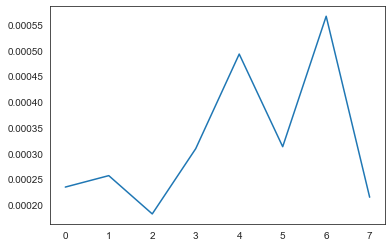

In [75]:
plt.plot(scaling_factors)

In [76]:
data_stack_scaled = np.zeros(shape=data_stack_dc_removed.shape)
for trace_num, scaling_factor in enumerate(scaling_factors):
    data_stack_scaled[:,trace_num] = scaling_factor*data_stack_dc_removed[:,trace_num]

In [77]:
data_stack_scaled[:600,:].shape

(600, 8)

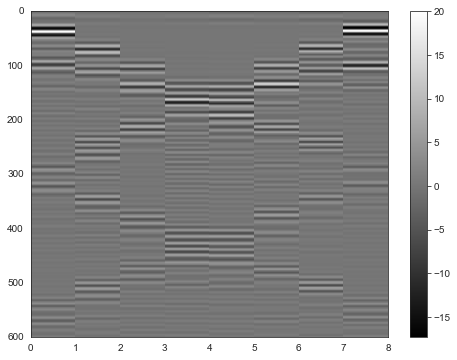

In [78]:
plt.figure(figsize=(8,6))
plt.pcolormesh(data_stack_scaled[:600,:], cmap='gray')
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

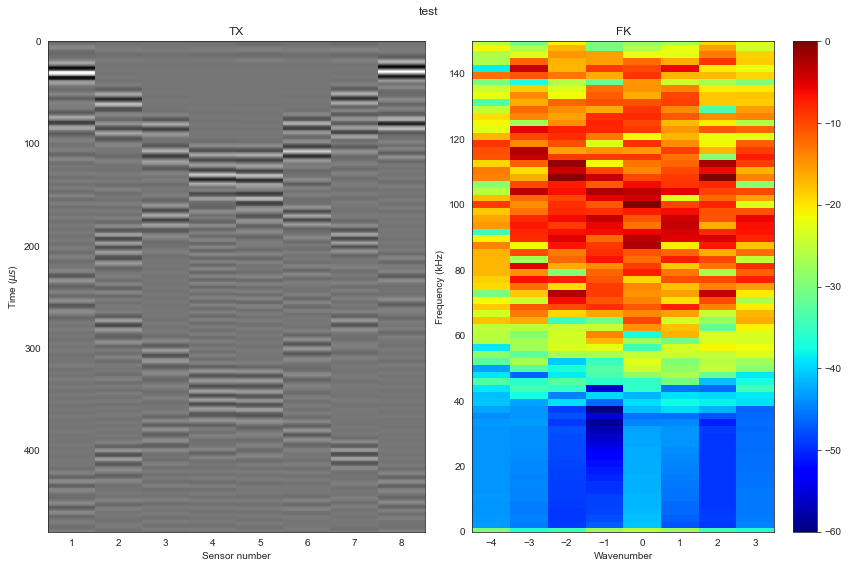

In [79]:
tx_fk_plot(data_stack_scaled[:600,:], native_dt, dx=make_dtheta(1), title='test')

In [80]:
1/native_dt, 1e6

(1250000.0, 1000000.0)

In [81]:
data_filt = butter_lowpass_filter(data_stack_scaled, 120e3, 4, 1/native_dt)

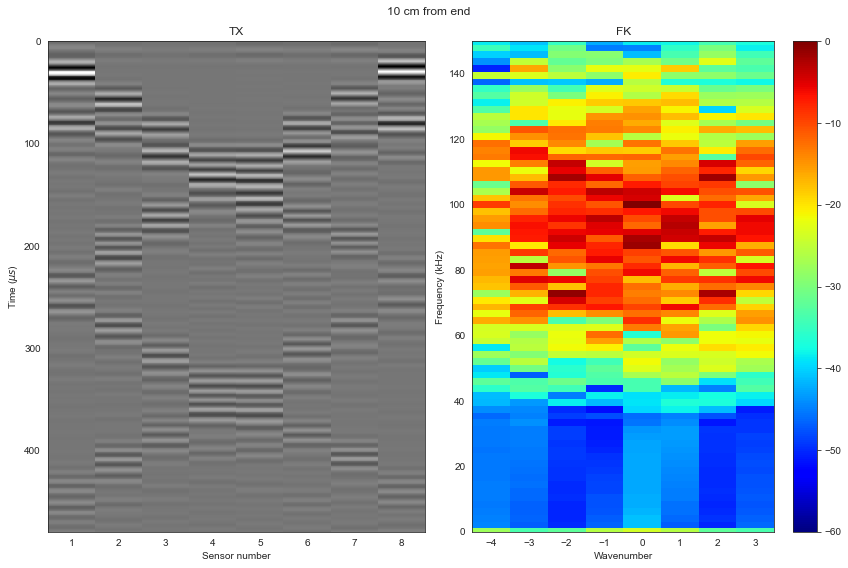

In [90]:
tx_fk_plot(data_filt[:600,:], native_dt, dx=make_dtheta(1), title='10 cm from end')

In [83]:
ds = np.arange(5, 9.0, 0.05)

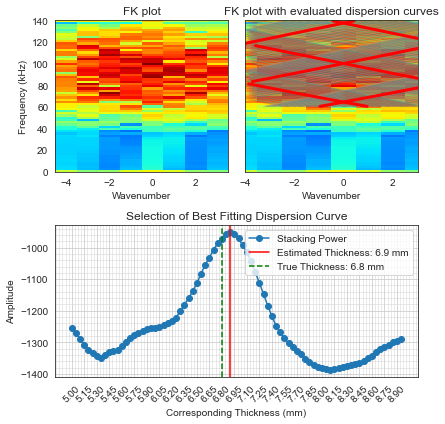

6.9

In [89]:
fk, k_array, f_array = make_fk(data_filt[:600,:], native_dt, make_dtheta(1))
#fk, k_array, f_array = make_fk(data_stack_scaled, native_dt, make_dtheta(1))
#fk = np.abs(fk)
fk = 20*np.log10(np.abs(fk)/np.max(np.abs(fk)))
FK_thickness_estimation(fk, k_array, f_array, make_dtheta(1), steel.vp_antisym['A0'], ds, 60e3, 140e3, angular=True, circumference=circ, d_true=6.8, db=False, circ_correction=True)
